# Tanzania Water Wells


Access to water is crucial for daily life and well-being, with its scarcity or inadequacy often leading to significant discomfort and economic challenges, sometimes resulting in poverty. To address these issues, Tanzania is implementing a strategy to provide wells across the country. With a population of over 57 million people relying on these water points, it is essential to maintain their functionality. Although many wells are operational, some require repairs, and others have failed. Efficiently identifying and addressing these problems will improve water access and enhance the quality of life for Tanzanian communities.

# Objectives

Classify water pumps as Functional, Needs Repair, or Non-Functional using data from Taarifa and the Tanzanian Ministry of Water, based on variables like pump type, installation date, and management practices.

Use predictive insights to optimize maintenance scheduling and resource allocation, reducing pump downtime and ensuring a steady supply of clean water to Tanzanian communities.

Data Understanding.
1. Import data
2. Collect information about the data
3. Describe the data
4. Reference.
The data for this project was provided by [Driven Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). This data consists of information from various wells in Tanzania.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Data Understanding
# loading the dataset using the compression zip

data_values = pd.read_csv('Data\Training set values.csv')   # Training set
data_labels = pd.read_csv('Data\Training set labels.csv')  # Training set labels              

In [6]:
# display the first 5 rows of the labels
data_labels.head()


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
print(data_values.columns)
print(data_labels.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
Index(['id', 'status_group'], dtype='object')


Here we printed both columns of labels and values. To check if both have the ID column. The id column is listed hence us merging the two dta sets will not fail as it knows which column to use to join the data.

In [10]:
# Check for exact column names
print(data_values.columns.tolist())
print(data_labels.columns.tolist())

# Check data types
print(data_values.dtypes)
print(data_labels.dtypes)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
['id', 'status_group']
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage    

In the above we verified both the column and the data type. To ensure id is actually named id in both data frames and has the correct data type ewhich in the above case is interger. Sometimes column names can be formatted differently eg, id and ID.

In [11]:
# Check for duplicates
print(data_values['id'].duplicated().sum())
print(data_labels['id'].duplicated().sum())

# Display first few rows of each DataFrame
print(data_values.head())
print(data_labels.head())

0
0
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  q

In the above we checked for duplicates to prevent us from any issues that might prevent us from moving on with the merging.

In [12]:
# Create a combined DataFrame with both the value and label data joined on the 'id' column
df = pd.merge(data_values, data_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


We then proceed to merge.

In [14]:
import pandas as pd

def data_shape(data):
    """Simple function to provide the shape of the data"""
    print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

# Example usage:
# Assuming you have a DataFrame named 'df'
# data_shape(df)


In the above the shape function basically provides the number of rows and columns in it, that is useful for a quick data understanding

In [15]:
def data_info(data):
    """Simple function to provide the info of the data"""
    print(data.info(), '\n')
    
    

 Provides information about the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.

In [16]:
def print_column_types(data):
    """Print categorical and numerical columns in a dataset"""
    # Identify categorical and numerical columns
    categorical_cols = []
    numerical_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)
    
    # Print categorical columns
    out = print(f"Categorical Columns:", categorical_cols,'\n')
     
    # Print numerical columns
    out = print(f"Numerical Columns:", numerical_cols,'\n')
    
    return out 

In [17]:
import numpy as np  # Ensure NumPy is imported for rounding

def identify_duplicates(data):
    """Identify and report the number of duplicate rows in the DataFrame."""
    # Count duplicated rows directly using pandas
    num_duplicates = data.duplicated().sum()
    
    if num_duplicates == 0:
        print("The Data has no duplicates.\n")
    else:
        # Calculate percentage of duplicated rows
        duplicates_percentage = np.round((num_duplicates / len(data)) * 100, 3)
        print(f"The Data has {num_duplicates} duplicated rows.")
        print(f"This constitutes {duplicates_percentage}% of the data set.\n")

# Example usage:
# Assuming you have a DataFrame named 'df'
# identify_duplicates(df)

 creates a function to check for duplicates in a DataFrame, count them, and report the number of duplicate rows as well as their percentage of the total dataset. 

In [20]:
def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    print(data.describe(), '\n')

checks and displays descriptive statistics of a DataFrame, we can use the pandas describe() method. This method provides various descriptive statistics for numerical columns, such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [21]:
# helper function to check for unique values in a column
def find_unique_values(data):
        print(data.nunique(),'\n')
    

Finds any unique values for each column

In [27]:
def explore(data):
    """Group of functions to explore data """
    data_shape(data)
    data_info(data)
    print_column_types(data)
    data_describe(data)

It combines multiple helper functions into one, making it easier to perform all the essential data exploration tasks in a single call. 

In [28]:
explore(df)

The DataFrame has:
	* 59400 rows
	* 41 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distric

In [29]:
df['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

calculate and display the count of unique values in the 'status_group' column of a DataFrame named df.

In [31]:
df['status_group'].replace({'functional needs repair': 'non functional'}, inplace=True)

Replaces or unique vaues called functional needs repair to the non functional group

In [32]:
df['status_group'].value_counts()

status_group
functional        32259
non functional    27141
Name: count, dtype: int64

Rechecks that the replacement was done successfully

### 3. Data Preparation

Data preparation is a crucial step in data analysis and machine learning that involves cleaning and transforming raw data into a format suitable for analysis or modeling. The main goals of data preparation are to handle missing values, encode categorical variables, normalize or standardize numerical features, and ensure data consistency.

A number of the features overlap, including waterpoint_type and waterpoint_type_group as well as extraction_type, extraction_type_group, and extraction_type_class (a description of all features can be found [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)). Due to the same information being represented at several levels, these would cause multicollinearity concerns, hence in order to decrease the dimensionality of the data, the most generic columns for each overlapped column were retained. 

Also, several features, such 'num_private' lacked feature descriptions that explained what they were, so I decided not to use them.

"**extraction_type**" , "**extraction_type_group**" and  "**extraction_type_class**" columns

In [34]:
# Group the data by the extraction_type, extraction_type_group, and extraction_type_class
df.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

extraction_type_class is picked as we want to determine a high-level view and is useful for initial insights and when you need a broad categorization.

'**water_quality**' and '**quality_group columns**'


In [38]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

'**source**' , '**source_type**' and '**source_class**' columns

In [39]:
df.groupby(['source_class', 'source_type', 'source']).size()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

We picked source, I love the detail, its impressive.

**payment** and **payment_type** columns

In [42]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

Same info, I picked payment_type

**waterpoint_type** and **waterpoint_type_group**

In [43]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

I decided to keep 'waterpoint_type' which contains more detail.

scheme_management** , **management** and **management_group** columns

In [45]:
df['scheme_management'].value_counts(dropna=False)

scheme_management
VWC                 36793
WUG                  5206
NaN                  3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [46]:
df.groupby(['management_group', 'management']).size()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64

In [47]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

Same output to drop out guantity group

Drop columns

In [48]:
col_to_drop = ['id', 'recorded_by', 'public_meeting', 'installer','ward', 'longitude', 'latitude', 'region_code', 'district_code', 
                 'wpt_name','scheme_name', 'extraction_type', 'extraction_type_group',
                 'payment', 'quality_group', 'source', 'source_class', 'quantity_group', 
                 'scheme_management', 'management', 'waterpoint_type_group',
                   'subvillage', 'num_private']

In [49]:
dfn = df.drop(col_to_drop, axis = 1)
dfn.shape

(59400, 18)

In [50]:
print_column_types(dfn)

Categorical Columns: ['date_recorded', 'funder', 'basin', 'region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source_type', 'waterpoint_type', 'status_group'] 

Numerical Columns: ['amount_tsh', 'gps_height', 'population', 'construction_year'] 



14:Categorial

4:Numerical

#### Data Cleaning

In this section we will check for:
- Missing Values
- Duplicates
- Outliers

In [56]:
# helper function to check for missing values

def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

In [57]:
data_missing(dfn)

The data has missing values in the following columns:
Index(['funder', 'permit'], dtype='object')

The total number of missing values in each column:
funder    3637
permit    3056
dtype: int64
 
funder    6.122896
permit    5.144781
dtype: float64



There are missing values in 'permit' column. I intend to drop them since they only account to a very small percentage of 5% of the entire column.

In [58]:
# Drop the missing values
dfn.dropna(axis=0, subset=['permit'], inplace=True)

##### Duplicated data

Duplicated data refers to instances where the same data entry appears more than once in a dataset. This duplication can occur due to various reasons, such as data collection errors, merging of datasets, or system issues. It is important to understand that duplicated data is not necessarily incorrect or invalid, as it can occur naturally in certain scenarios.

However, when working with duplicated data, it is crucial to be cautious of its potential impact on the analysis or modeling process. Duplicated data can introduce bias and affect the accuracy of statistical analyses or machine learning models. In particular, it can lead to overfitting, where the model becomes too specialized to the duplicated data and performs poorly on new, unseen data.

In [59]:
# helper function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [60]:
identify_duplicates(dfn)

The Data has 9102 duplicated rows.
This constitutes 16.154% of the data set. 



The dataset has duplicates but we will retain them.

##### Outliers
Outliers are data points that significantly deviate from the majority of the other data points in a dataset.

There can be several causes for the presence of outliers:

- Natural variation
- Data entry errors
- Anomalous observations
- Sampling issues
- Data processing errors

In [62]:
def evaluate_outliers(data, sample_size=1000):
    """Function to evaluate outliers in numeric columns and plot their distributions"""
    
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Randomly sample the data
    data_sample = data.sample(n=sample_size, random_state=42)
    
    # Iterate over numeric columns
    for column in numeric_columns:
        # Plot boxplot for the column
        plt.figure(figsize=(10, 2))
        plt.boxplot(data_sample[column], notch=True, sym='r.')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()

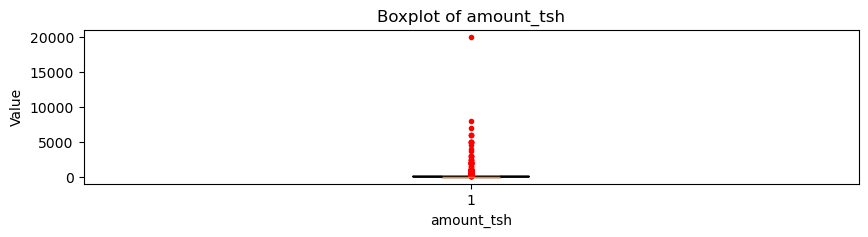

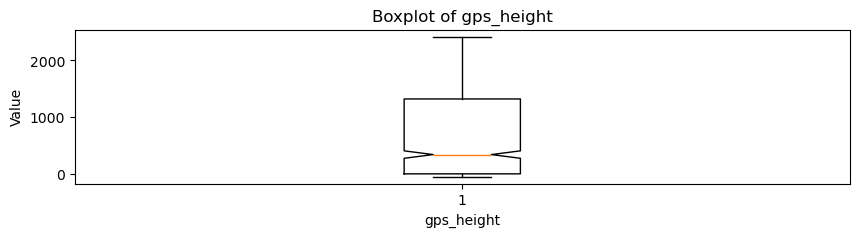

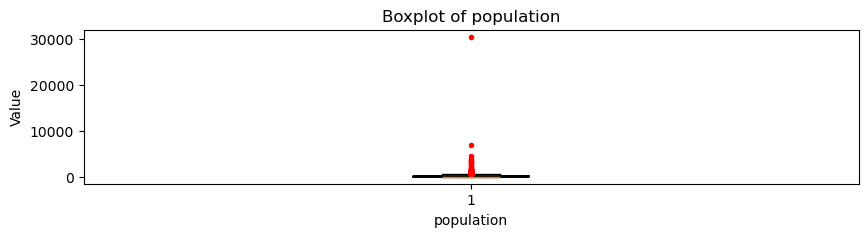

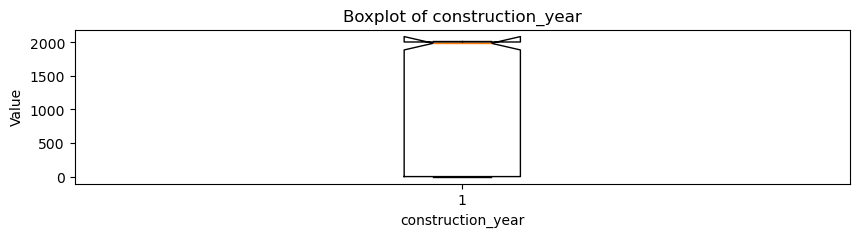

In [63]:
evaluate_outliers(dfn)

Three numeric colmns have outliers but  will work with them.

In [66]:
dfn.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'basin',
       'region', 'lga', 'population', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type',
       'status_group'],
      dtype='object')

##### Data Formating and Labeling

In [68]:
def rename_and_format_columns(df, column_mapping):
    """
    This function renames and formats the columns of a DataFrame based on the provided mapping.
    The mapping should be a dictionary where the keys are the current column names and the values are the desired new names.
    """
    for old_col, new_col in column_mapping.items():
        new_col = new_col.strip().replace(' ', '_').lower()
        df.rename(columns={old_col: new_col}, inplace=True)

# Example usage:
column_mapping = {
    'lga': 'local_government_area',
    'Column Name 1': 'new_column_1',
    'Column Name 2': 'new_column_2',
}

rename_and_format_columns(dfn, column_mapping)

the above function is designed to rename and format the columns 